<a href="https://colab.research.google.com/github/prikmm/License-Plate-Detection/blob/main/Train_Model_Conversion_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automatic License Plate Detection

In [1]:
!pip uninstall wandb -y

In [2]:
!pip install gdown

In [3]:
import gdown

url = 'https://drive.google.com/uc?id=1ALTC356iZxLafkiRqG1AfvnM9UyDqYpe'
output = 'YoloV5_files.zip'
gdown.download(url, output, quiet=False)
!unzip -q YoloV5_files.zip

Downloading...
From: https://drive.google.com/uc?id=1ALTC356iZxLafkiRqG1AfvnM9UyDqYpe
To: /content/YoloV5_files.zip
100%|██████████| 238M/238M [00:03<00:00, 62.7MB/s]


In [4]:
!ls

License-Plate-Detection-Diff-Formats  sample_data  YoloV5_files.zip


# Repo [YOLOv5](https://github.com/ultralytics/yolov5)

In [5]:
# Clone YOLOv5 code
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -qr requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 10008, done.
remote: Total 10008 (delta 0), reused 0 (delta 0), pack-reused 10008
Receiving objects: 100% (10008/10008), 10.35 MiB | 25.37 MiB/s, done.
Resolving deltas: 100% (6938/6938), done.
/content/yolov5
     |████████████████████████████████| 596 kB 5.3 MB/s 


In [6]:
!mkdir -p ../Dataset
!cp -rf ../License-Plate-Detection-Diff-Formats/YoloV5_format/* ../Dataset

In [7]:
!ls

CONTRIBUTING.md  Dockerfile  LICENSE	requirements.txt  tutorial.ipynb
data		 export.py   models	setup.cfg	  utils
detect.py	 hubconf.py  README.md	train.py	  val.py


In [8]:
import os
import sys
import numpy as np

# YOLOv5 Training

In [9]:
data_file_path = "../Dataset/new_data.yaml"
yolo_version = "s"
yolo_config_path = f"models/yolov5{yolo_version}.yaml"
yolo_weights = f"yolov5{yolo_version}.pt"

In [10]:
!echo "train: ../Dataset/train/images" >> {data_file_path}
!echo "val: ../Dataset/valid/images" >> {data_file_path}
!echo "test: ../Dataset/test/images" >> {data_file_path}

!echo "nc: 1" >> {data_file_path}
!echo "names: ['license_plate']" >> {data_file_path}

!cat {data_file_path}

train: ../Dataset/train/images
val: ../Dataset/valid/images
test: ../Dataset/test/images
nc: 1
names: ['license_plate']


In [11]:
!python train.py -h

usage: train.py [-h] [--weights WEIGHTS] [--cfg CFG] [--data DATA] [--hyp HYP]
                [--epochs EPOCHS] [--batch-size BATCH_SIZE] [--imgsz IMGSZ]
                [--rect] [--resume [RESUME]] [--nosave] [--noval]
                [--noautoanchor] [--evolve [EVOLVE]] [--bucket BUCKET]
                [--cache [CACHE]] [--image-weights] [--device DEVICE]
                [--multi-scale] [--single-cls] [--adam] [--sync-bn]
                [--workers WORKERS] [--project PROJECT] [--name NAME]
                [--exist-ok] [--quad] [--linear-lr]
                [--label-smoothing LABEL_SMOOTHING] [--patience PATIENCE]
                [--freeze FREEZE] [--save-period SAVE_PERIOD]
                [--local_rank LOCAL_RANK] [--entity ENTITY] [--upload_dataset]
                [--bbox_interval BBOX_INTERVAL]
                [--artifact_alias ARTIFACT_ALIAS]

optional arguments:
  -h, --help            show this help message and exit
  --weights WEIGHTS     initial weights path
  --cfg CFG  

In [12]:
!python train.py --img 448 --batch 32 --epochs 3 --data {data_file_path} --cfg {yolo_config_path} --weights {yolo_weights} --cache

train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=../Dataset/new_data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=3, batch_size=32, imgsz=448, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-103-g7a39803 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, 

In [13]:
experiment_dir = "exp"

!python val.py --img 448 --batch 1 --data {data_file_path} --weights runs/train/{experiment_dir}/weights/best.pt

val: data=../Dataset/new_data.yaml, weights=['runs/train/exp/weights/best.pt'], batch_size=1, imgsz=448, conf_thres=0.001, iou_thres=0.6, task=val, device=, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.0-103-g7a39803 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning '../Dataset/valid/labels.cache' images and labels... 53 found, 0 missing, 0 empty, 0 corrupted: 100% 53/53 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 53/53 [00:01<00:00, 28.24it/s]
                 all         53         54      0.517      0.519      0.438      0.117
Speed: 0.3ms pre-process, 19.7ms inference, 4.5ms NMS per image at shape (1, 3, 448, 448)
Results saved to runs/val/exp


# YOLOv5 Detect

In [14]:
!ls

CONTRIBUTING.md  export.py   __pycache__       setup.cfg       val.py
data		 hubconf.py  README.md	       train.py        yolov5s.pt
detect.py	 LICENSE     requirements.txt  tutorial.ipynb
Dockerfile	 models      runs	       utils


In [15]:
# Download OpenALPR Benchmarks
%cd ..
!git clone https://github.com/openalpr/benchmarks
%cd yolov5

/content
Cloning into 'benchmarks'...
remote: Enumerating objects: 1752, done.
remote: Total 1752 (delta 0), reused 0 (delta 0), pack-reused 1752
Receiving objects: 100% (1752/1752), 187.98 MiB | 35.16 MiB/s, done.
Resolving deltas: 100% (34/34), done.
/content/yolov5


In [16]:
!ls runs/train

exp


In [17]:
!python detect.py --source ../benchmarks/endtoend/us --conf 0.4 --weights runs/train/{experiment_dir}/weights/best.pt --save-txt

detect: weights=['runs/train/exp/weights/best.pt'], source=../benchmarks/endtoend/us, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-103-g7a39803 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/222 /content/benchmarks/endtoend/us/0b86cecf-67d1-4fc0-87c9-b36b0ee228bb.jpg: 384x640 Done. (0.029s)
image 2/222 /content/benchmarks/endtoend/us/12c6cb72-3ea3-49e7-b381-e0cdfc5e8960.jpg: 384x640 Done. (0.027s)
image 3/222 /content/benchmarks/endtoend/us/1e241dc8-8f18-4955-8988-03a0ab49f813.jpg: 384x640 Done. (0.027s)
image 4/222 /content/benchmarks/endtoend/us/21d8c31d-3deb-494b-9c6

In [18]:
!python detect.py --source ../benchmarks/endtoend/eu --conf 0.4 --weights runs/train/{experiment_dir}/weights/best.pt --save-txt

detect: weights=['runs/train/exp/weights/best.pt'], source=../benchmarks/endtoend/eu, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-103-g7a39803 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/108 /content/benchmarks/endtoend/eu/eu1.jpg: 480x640 Done. (0.032s)
image 2/108 /content/benchmarks/endtoend/eu/eu10.jpg: 544x640 Done. (0.033s)
image 3/108 /content/benchmarks/endtoend/eu/eu11.jpg: 416x640 Done. (0.030s)
image 4/108 /content/benchmarks/endtoend/eu/eu2.jpg: 480x640 Done. (0.031s)
image 5/108 /content/benchmarks/endtoend/eu/eu3.jpg: 480x640 Done. (0.030s)
image 6/108

In [19]:
!python detect.py --source ../benchmarks/endtoend/br --conf 0.4 --weights runs/train/{experiment_dir}/weights/best.pt --save-txt

detect: weights=['runs/train/exp/weights/best.pt'], source=../benchmarks/endtoend/br, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-103-g7a39803 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/115 /content/benchmarks/endtoend/br/AYO9034.jpg: 384x640 Done. (0.021s)
image 2/115 /content/benchmarks/endtoend/br/AZJ6991.jpg: 640x640 Done. (0.025s)
image 3/115 /content/benchmarks/endtoend/br/FZB9581.jpg: 640x640 Done. (0.023s)
image 4/115 /content/benchmarks/endtoend/br/GWT2180.jpg: 384x640 Done. (0.020s)
image 5/115 /content/benchmarks/endtoend/br/HPM9362.jpg: 480x640 Done. (0

### Display Detected Images

In [20]:
from IPython.display import Image

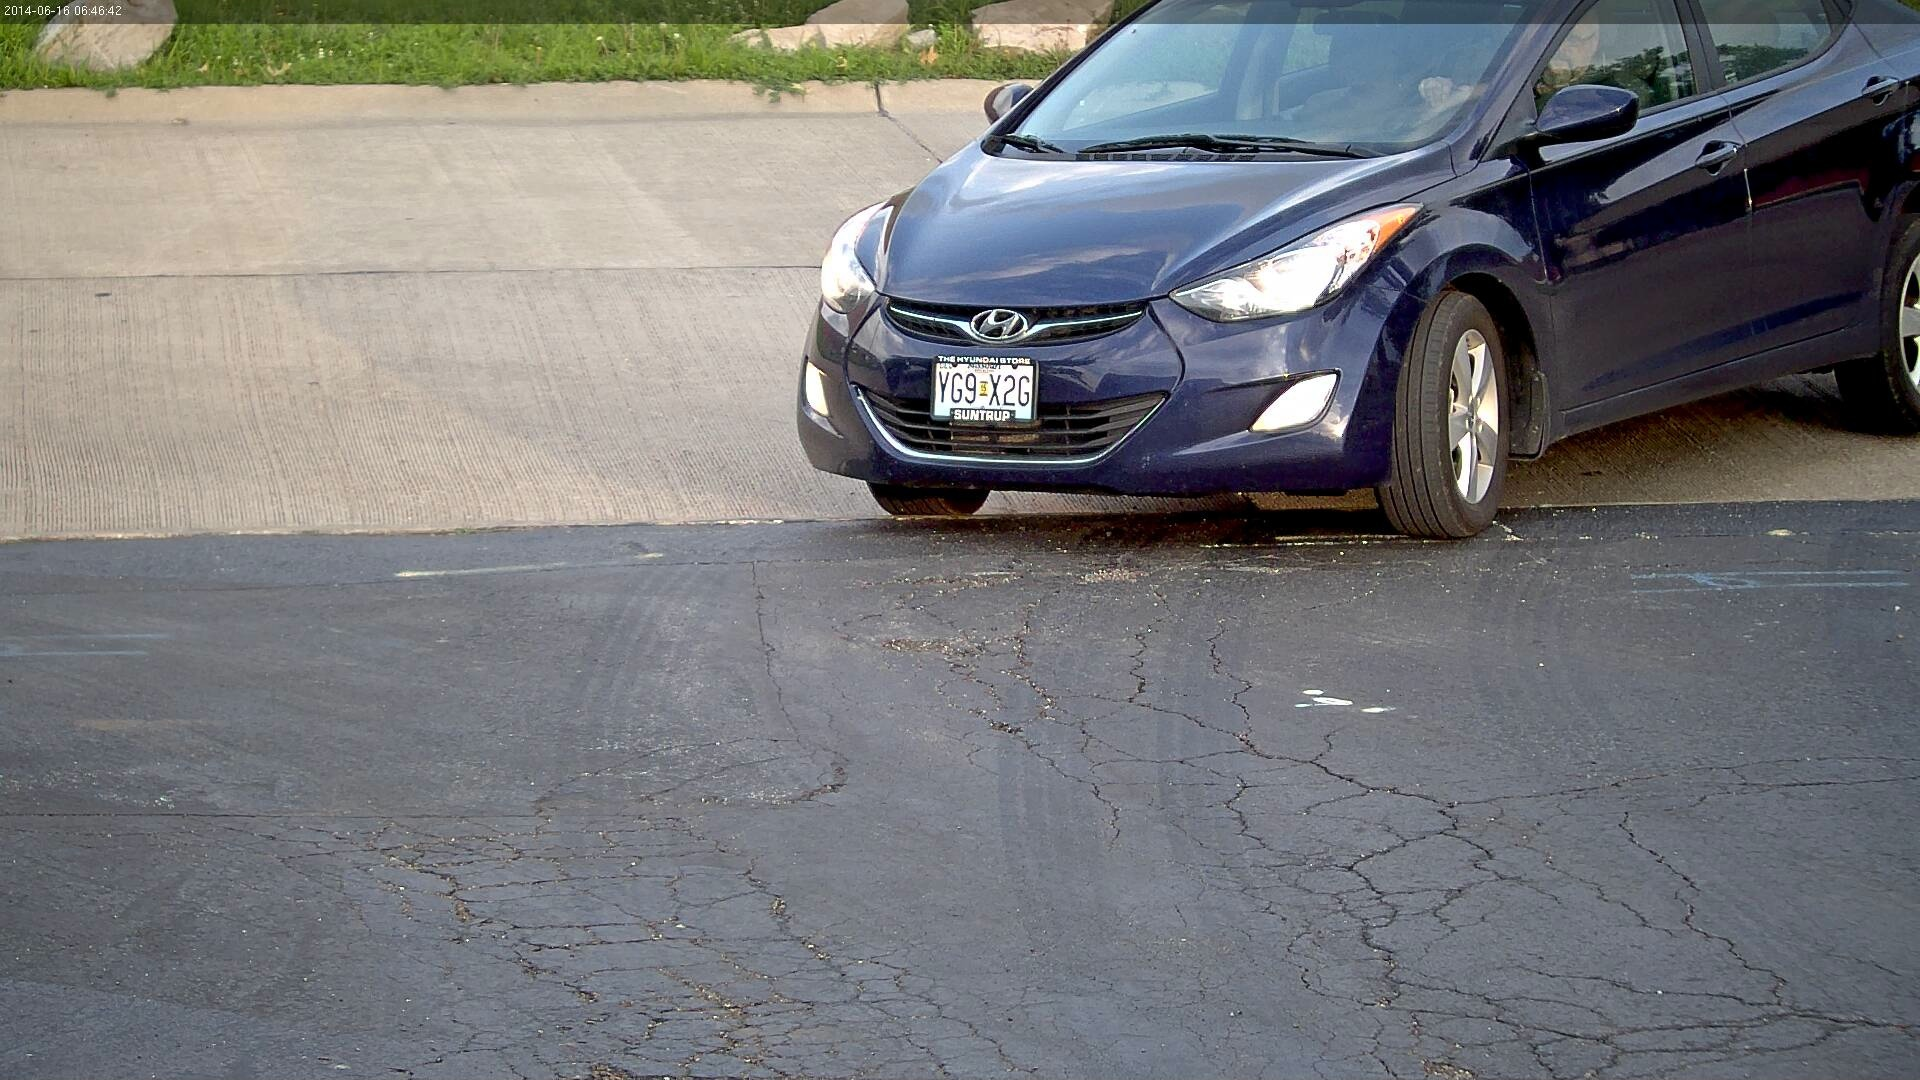

In [21]:
Image('runs/detect/exp/0b86cecf-67d1-4fc0-87c9-b36b0ee228bb.jpg')

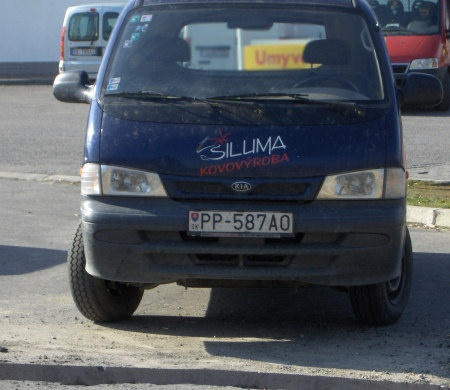

In [22]:
Image('runs/detect/exp2/test_001.jpg')

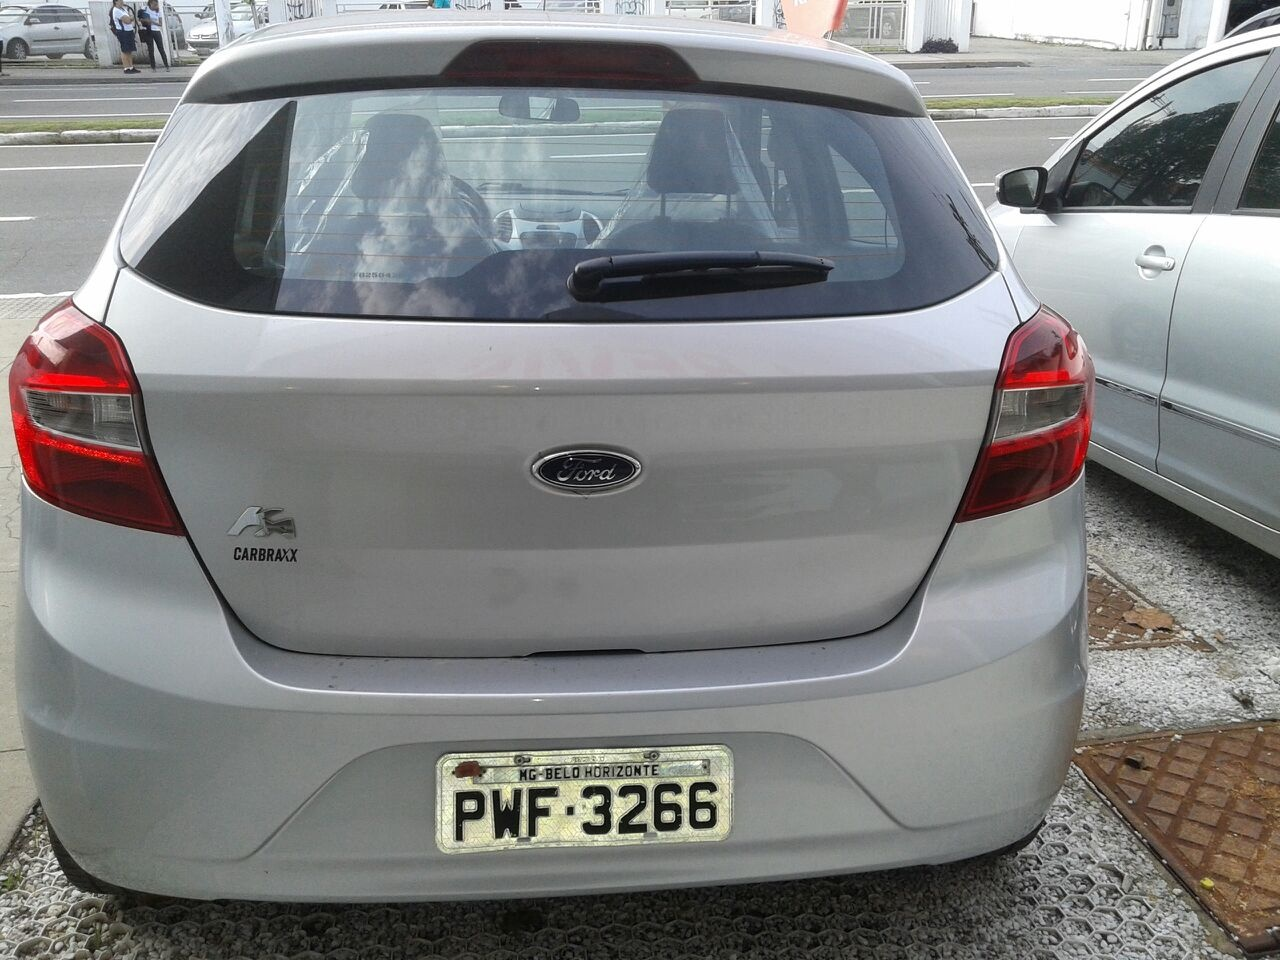

In [23]:
Image('runs/detect/exp3/PWF3266.jpg')

## OCR 

### get detected ALPR bounding box

In [24]:
# list saved .txt
!ls runs/detect/exp/labels

In [25]:
# read .txt to get x,y,w,h of ALPR
def read_txt(filepath):
    f = open(filepath, 'r')
    lines = f.readlines()
         
    # read objects from each line of .txt
    objects = []
    for line in lines:
        line=line.rstrip()
        obj = [int(float(i)) for i in line.split(' ')]
        objects.append(obj)
    #print(objects)
    return objects

### OCR using PyTesseract

In [26]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14072 sha256=972c3f9d93d09077bb4622d14b487f62be7f6ccbe07a65d36be49aa9e34031eb
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract


In [27]:
DETECT_PATH = f'runs/detect/{experiment_dir}/'
IMG_NAME    = 'us10'

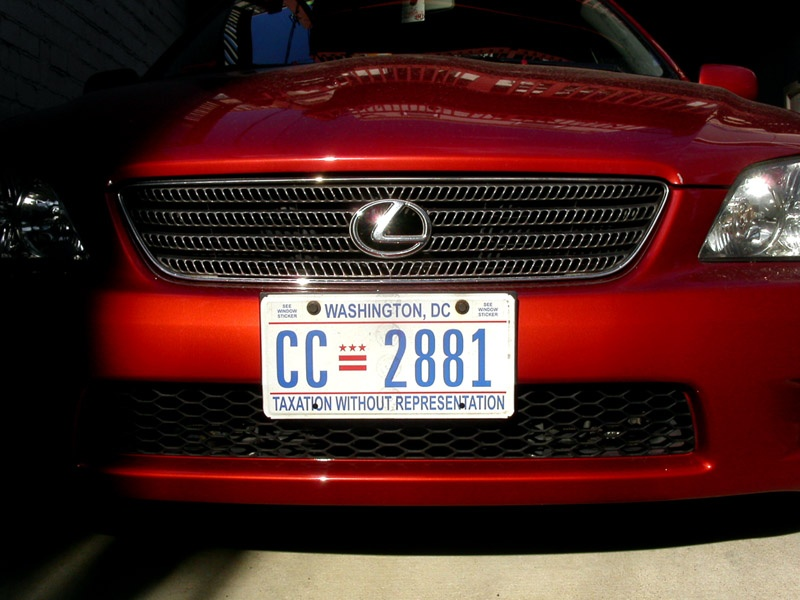

In [28]:
Image(DETECT_PATH+IMG_NAME+'.jpg')

In [29]:
import pytesseract
import cv2
import matplotlib.pyplot as plt
img = cv2.imread(DETECT_PATH+IMG_NAME+'.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
lics = read_txt(DETECT_PATH +'labels/'+IMG_NAME+'.txt')

for lic in lics:
    c, x, y, w, h = lic
    print(x,y,w,h) # center of the bounding box
    img_alpr = img[y-int(h/2):y+int(h/2),x-int(w/2):x+int(w/2)]
    plt.imshow(img_alpr)
    txt = pytesseract.image_to_string(img_alpr)
    print(txt)
    
#    img = cv2.putText(img, txt, (x-int(w/2),y-int(h/2)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)   
#cv2.imwrite('alpr_us1.jpg', img)

FileNotFoundError: ignored

# Converting Model to TFLite:

In [30]:
!ls

CONTRIBUTING.md  export.py   __pycache__       setup.cfg       val.py
data		 hubconf.py  README.md	       train.py        yolov5s.pt
detect.py	 LICENSE     requirements.txt  tutorial.ipynb
Dockerfile	 models      runs	       utils


In [31]:
!pip install flatbuffers==1.12
!pip install --upgrade tensorflow
    
!ls

  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 2.0
    Uninstalling flatbuffers-2.0:
      Successfully uninstalled flatbuffers-2.0
CONTRIBUTING.md  export.py   __pycache__       setup.cfg       val.py
data		 hubconf.py  README.md	       train.py        yolov5s.pt
detect.py	 LICENSE     requirements.txt  tutorial.ipynb
Dockerfile	 models      runs	       utils


In [32]:
best_model_name = "best"
best_experiment_dir = "exp"
best_model_path = os.path.join(f"runs/train/{best_experiment_dir}/weights", best_model_name+".pt")
dest_folder = os.path.join("../yolo-models")
os.makedirs(dest_folder, exist_ok=True)

!cp -rf {best_model_path} {dest_folder}

In [33]:
image_size = 448
batch_size = 1
channels = 3
width = image_size
height = image_size
int8 = False
test_images_folder = "../License-Plate-Detection-Diff-Formats/YoloV5_format/test/images"

int8 = False
if int8:
    quantization_lvl = "-int8.tflite"
else:
    quantization_lvl = "-fp16.tflite"

tflite_model_path = os.path.join(dest_folder, best_model_name+quantization_lvl)

In [41]:
command = f'python export.py --data {data_file_path} --weights {os.path.join(dest_folder, best_model_name+".pt")} --img-size {image_size} --batch-size {batch_size} --include tflite {"--int8" if int8 else ""} --device cpu'

In [42]:
command

'python export.py --data ../Dataset/new_data.yaml --weights ../yolo-models/best.pt --img-size 448 --batch-size 1 --include tflite  --device cpu'

In [43]:
!{command}

export: data=../Dataset/new_data.yaml, weights=../yolo-models/best.pt, imgsz=[448], batch_size=1, device=cpu, half=False, inplace=False, train=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=13, verbose=False, workspace=4, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
YOLOv5 🚀 v6.0-103-g7a39803 torch 1.10.0+cu111 CPU

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from ../yolo-models/best.pt (14.3 MB)

TensorFlow saved_model: starting export with tensorflow 2.7.0...

                 from  n    params  module                                  arguments                     
2021-11-23 10:27:26.830694: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
  0                -1  1      3520  models.common.Conv                      [3, 32, 6, 2, 2]              
  1                -1  1  

In [45]:
!python val.py --img 448 --batch 1 --data {data_file_path} --weights {tflite_model_path} --device cpu

val: data=../Dataset/new_data.yaml, weights=['../yolo-models/best-fp16.tflite'], batch_size=1, imgsz=448, conf_thres=0.001, iou_thres=0.6, task=val, device=cpu, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.0-103-g7a39803 torch 1.10.0+cu111 CPU

Loading ../yolo-models/best-fp16.tflite for TensorFlow Lite inference...
Forcing --batch-size 1 square inference shape(1,3,448,448) for non-PyTorch backends
val: Scanning '../Dataset/valid/labels.cache' images and labels... 53 found, 0 missing, 0 empty, 0 corrupted: 100% 53/53 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 53/53 [00:11<00:00,  4.62it/s]
                 all         53         54      0.536      0.389       0.37      0.102
Speed: 1.2ms pre-process, 184.9ms inference, 21.9ms NMS per image at shape (1, 3, 448, 448)
Results

In [46]:
!ls ../yolo-models

best-fp16.tflite  best.pt  best_saved_model
